C:\Users\bipas\AppData\Local\Temp\ipykernel_36776\3856591734.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538521  72.598899  71.292311  71.545897  135480400
2020-01-03  71.833313  72.594079  71.608707  71.765690  146322800
2020-01-06  72.405663  72.444306  70.702997  70.954173  118387200
2020-01-07  72.065147  72.671341  71.845369  72.415337  108872000
2020-01-08  73.224426  73.526318  71.768101  71.768101  132079200
Mean Squared Error: 197.74967450519557
R^2 Score: 0.8750643454385411


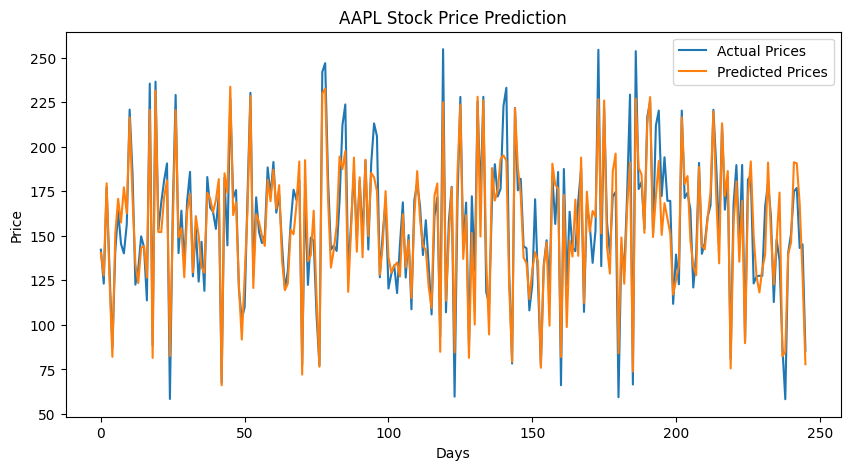


Predicted Prices for Next 30 Days:
[224.81009041 227.69384352 227.94211191 228.62962776 228.17128386
 229.46036693 232.3250236  234.4162158  234.29208891 236.58380839
 238.74183815 241.66378415 242.00754938 242.03617942 241.84520036
 245.57880371 246.55279546 245.33053532 246.7342263  246.89654607
 249.67523949 252.00516649 246.8201603  248.48165327 252.96962464
 253.71442981 256.51224892 257.29520312 254.01997291 250.78292097]


In [4]:
# ================================
# Stock Price Predictor
# ================================
!pip install yfinance scikit-learn matplotlib pandas
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
ticker = "AAPL"
df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
print(df.head())
df['Prediction'] = df[['Close']].shift(-30)
X = np.array(df[['Close']])
X = X[:-30]
y = np.array(df['Prediction'])
y = y[:-30]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
plt.figure(figsize=(10,5))
plt.plot(y_test, label="Actual Prices")
plt.plot(predictions, label="Predicted Prices")
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()
x_future = df[['Close']].tail(30)
future_prediction = model.predict(np.array(x_future))
print("\nPredicted Prices for Next 30 Days:")
print(future_prediction)
